# Useful pandas methods and attributes

A collection of pandas tricks

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

## Speed improving libraries

- pyarrow
- vaex
- .parquet

Apply vetorial
- swifter


# Series

#### Creating a series out of a list and out of a dict (comprehension).

In [ ]:
actor_names = ['tom hanks', 'arnold schwarzenegger', 'xuxa', 'faustão']
actor_ages = [60, 70, 50, 65]

In [ ]:
actors = pd.Series(actor_ages, actor_names)
actors.name = 'actors'
actors.index.name = 'names'
actors

names
tom hanks                60
arnold schwarzenegger    70
xuxa                     50
faustão                  65
Name: actors, dtype: int64

Dict

In [ ]:
actor_names_dict = list(zip(actor_names, actor_ages))
actor_names_dict = dict(actor_names_dict)
actor_names_dict

{'arnold schwarzenegger': 70, 'faustão': 65, 'tom hanks': 60, 'xuxa': 50}

In [ ]:
pd.Series(actor_names_dict, name='actors')

tom hanks                60
arnold schwarzenegger    70
xuxa                     50
faustão                  65
Name: actors, dtype: int64

Dict comprehension

In [ ]:
pd.Series({name:age for name, age in zip(actor_names, actor_ages)}, name='actors')

tom hanks                60
arnold schwarzenegger    70
xuxa                     50
faustão                  65
Name: actors, dtype: int64

#### Display options

To display more rows

In [ ]:
pd.options.display.min_rows = 7

Columns width

In [ ]:
pd.options.display.max_colwidth = 300

#### Alphabet

In [ ]:
from string import ascii_lowercase

Map function concatenating strings:

In [ ]:
alphabet = pd.Series(list(ascii_lowercase), map(lambda x: 'label_'+ x, list(ascii_lowercase)))
alphabet.head(3)

label_a    a
label_b    b
label_c    c
dtype: object

Accessing elements by label includes last one:

In [ ]:
alphabet[:'label_b']

label_a    a
label_b    b
dtype: object

Adding suffix:

In [ ]:
alphabet.add_suffix('_label').head(3)

label_a_label    a
label_b_label    b
label_c_label    c
dtype: object

#### Count nulls (nans)

In [ ]:
count_nans = pd.Series([1, np.nan, 2, np.nan, 3, 4])
count_nans.isnull().sum()

2

In [ ]:
count_nans[np.isnan]

1   NaN
3   NaN
dtype: float64

## Is Unique

In [ ]:
alphabet.is_unique

True

## Treat at Read CSV

In [ ]:
wine = pd.read_csv('https://gist.githubusercontent.com/sh7ata/e075ff35b51ebb0d2d577fbe1d19ebc9/raw/b966d02c7c26bcca60703acb1390e938a65a35cb/drinks.csv',
                   usecols=['country', 'wine_servings'],
                   index_col='country',
                   ).squeeze()
wine_servings = wine.loc[wine.notnull()]

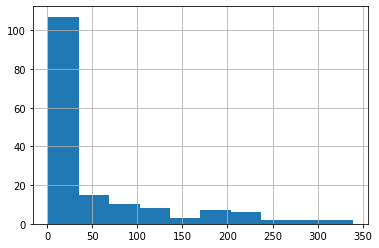

In [ ]:
wine.hist();

Somar valor à Série. Fill_value completa os outros, evitando desalinhamento.

In [ ]:
wine_servings.add(pd.Series({'Albania':6}), fill_value=0).head()

Albania               60.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
dtype: float64

## Filtering

In [ ]:
wine_servings.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [ ]:
wine_servings.filter(like='stan')

country
Kazakhstan      12.0
Kyrgyzstan       6.0
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [ ]:
wine_servings.where(lambda x: x > 40, 'too small').head()

country
Albania                     54
Algeria              too small
Andorra                    312
Angola                      45
Antigua & Barbuda           45
Name: wine_servings, dtype: object

In [ ]:
wine_servings.where(lambda x: x > 40).dropna().head()

country
Albania               54.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Name: wine_servings, dtype: float64

In [ ]:
wine_servings.mask(lambda x: x<=40).dropna().head()

country
Albania               54.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Name: wine_servings, dtype: float64

## Fast iteration

In [ ]:
mini_servings = wine_servings.iloc[0:9]
for i in mini_servings.items():
  print(i[0])

Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


## Apply

In [ ]:
wine_servings.apply(np.square).head()

country
Albania               2916.0
Algeria                196.0
Andorra              97344.0
Angola                2025.0
Antigua & Barbuda     2025.0
Name: wine_servings, dtype: float64

## Transform

Groupby

In [ ]:
df_hn.groupby('date')['views'].transform(lambda x: x/x.sum())

## Args, kwargs

In [ ]:
def multiply_by_self(x, minimum):
  if x <= minimum:
    return x * x
  else:
    return x

In [ ]:
wine_servings.apply(multiply_by_self, args=(200,)).head()

country
Albania              2916.0
Algeria               196.0
Andorra               312.0
Angola               2025.0
Antigua & Barbuda    2025.0
Name: wine_servings, dtype: float64

In [ ]:
wine_servings.apply(multiply_by_self, minimum=200).head()

country
Albania              2916.0
Algeria               196.0
Andorra               312.0
Angola               2025.0
Antigua & Barbuda    2025.0
Name: wine_servings, dtype: float64

# Dataframes

In [ ]:
nutrition = pd.read_csv('https://gist.githubusercontent.com/sh7ata/56976975b3c67caabb2efd80bb3a8467/raw/f1b7d2abf6770548edafee58ea15be71e2d28aac/Nutrition.csv', index_col='Unnamed: 0')
nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Select by position

In [ ]:
nutrition.set_index('name', inplace=True)

In [ ]:
nutrition.iloc[[5,6,12], :]

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,0.667 mg,0.060 mg,0.050 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,1.00 mcg,0,0.00 mcg,0.184 mg,48.2 mg,0.00 IU,0.08 mg,0.08 mg,15.5 mcg,22.00 mg,0.039 mg,0.42 mg,15.00 mg,0.155 mg,44.00 mg,299.00 mg,0.6 mcg,0.27 mg,1.92 g,0.116 g,0.086 g,0.177 g,0.020 g,0.257 g,0.071 g,0.056 g,0,0.071 g,0.106 g,0.217 g,0.020 g,0.065 g,0.071 g,0.086 g,0.076 g,0.020 g,0.051 g,0.125 g,4.97 g,2.0 g,1.91 g,0.97 g,0.00 g,0.94 g,0.00 g,0.00 g,0.00 g,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,0.084 mg,0.456 mg,0.209 mg,4825.00 IU,241.00 mcg,0.00 mcg,2895.00 mcg,0.00 mcg,1932.00 mcg,0,0.00 mcg,0.146 mg,52.0 mg,0.00 IU,2.02 mg,2.02 mg,108.6 mcg,107.00 mg,0.270 mg,2.25 mg,45.00 mg,0.714 mg,60.00 mg,648.00 mg,0.9 mcg,0.41 mg,4.98 g,0,0.220 g,0,0.064 g,0,0,0.114 g,0,0.260 g,0.392 g,0.246 g,0.079 g,0.195 g,0,0,0.167 g,0.048 g,0.178 g,0.256 g,6.70 g,3.7 g,3.01 g,0,0,0,0,0,0,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g
"Mango nectar, canned",100 g,51,0.1g,NaN,0,5.00 mg,1.5 mg,7.00 mcg,0.00 mcg,0.080 mg,0.070 mg,0.003 mg,0.003 mg,692.00 IU,35.00 mcg,0.00 mcg,402.00 mcg,26.00 mcg,0.00 mcg,0,0.00 mcg,0.015 mg,15.2 mg,0.00 IU,0.21 mg,0.21 mg,0.8 mcg,17.00 mg,0.015 mg,0.36 mg,3.00 mg,0.028 mg,2.00 mg,24.00 mg,0.4 mcg,0.02 mg,0.11 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.12 g,0.3 g,12.45 g,5.56 g,0.00 g,5.31 g,0.00 g,0.56 g,1.02 g,0.06 g,0.014 g,0.022 g,0.011 g,0.00 mg,0.0 g,0.08 g,0.00 mg,0.00 mg,86.63 g


## Single value extraction (performance)

In [ ]:
nutrition.at['Cauliflower, raw', 'calories']

25

In [ ]:
nutrition.iat[7, 6]

'69.3 mg'

## Find index location of label (get_loc)

In [ ]:
nutrition.index.get_loc('Taro leaves, raw')

6

In [ ]:
nutrition_mini = nutrition.sample(10)

In [ ]:
nutrition_mini.iloc[0:3, nutrition_mini.columns.get_loc('vitamin_b12'):]

,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Kohlrabi, raw",0.00 mcg,0.150 mg,62.0 mg,0.00 IU,0.48 mg,0.48 mg,0.1 mcg,24.00 mg,0.129 mg,0.40 mg,19.00 mg,0.139 mg,46.00 mg,350.00 mg,0.7 mcg,0.03 mg,1.70 g,0,0.105 g,0,0.007 g,0,0,0.019 g,0,0.078 g,0.067 g,0.056 g,0.013 g,0.039 g,0,0,0.049 g,0.010 g,0,0.050 g,6.20 g,3.6 g,2.60 g,0,0,0,0,0,0,0.10 g,0.013 g,0.007 g,0.048 g,0.00 mg,0.0 g,1.00 g,0.00 mg,0.00 mg,91.00 g
"Sapote, raw, mamey",0.00 mcg,0.720 mg,23.0 mg,0,2.11 mg,2.11 mg,0,18.00 mg,0.213 mg,0.78 mg,11.00 mg,0.204 mg,26.00 mg,454.00 mg,0,0.19 mg,1.45 g,0.073 g,0.049 g,0.147 g,0.012 g,0.147 g,0.073 g,0.049 g,0,0.061 g,0.073 g,0.073 g,0.024 g,0.061 g,0.085 g,0.195 g,0.085 g,0.049 g,0.049 g,0.073 g,32.10 g,5.4 g,20.14 g,7.66 g,0.00 g,8.01 g,0.00 g,0.38 g,4.09 g,0.46 g,0.169 g,0.102 g,0.097 g,0.00 mg,0,1.12 g,0,0,64.87 g
"Cereals ready-to-eat, Peanut Butter, Multi Grain CHEERIOS, GENERAL MILLS",5.40 mcg,1.780 mg,21.4 mg,143.00 IU,0,0,0,357.00 mg,0,28.89 mg,57.00 mg,0,214.00 mg,297.00 mg,0,13.39 mg,6.80 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00 g,6.0 g,32.50 g,0,0,0,0,0,0,6.19 g,0.890 g,2.700 g,2.290 g,0.00 mg,0,3.09 g,0,0,2.00 g


## Rename

Mapper requer especificação do índice

In [ ]:
nutrition_mini.rename(mapper={'serving_size': 'Pikachu'}, axis=1)

,Pikachu,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Kohlrabi, raw",100 g,27,0.1g,NaN,0,20.00 mg,12.3 mg,16.00 mcg,0.00 mcg,0.400 mg,0.165 mg,0.020 mg,0.050 mg,36.00 IU,2.00 mcg,0.00 mcg,22.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.150 mg,62.0 mg,0.00 IU,0.48 mg,0.48 mg,0.1 mcg,24.00 mg,0.129 mg,0.40 mg,19.00 mg,0.139 mg,46.00 mg,350.00 mg,0.7 mcg,0.03 mg,1.70 g,0,0.105 g,0,0.007 g,0,0,0.019 g,0,0.078 g,0.067 g,0.056 g,0.013 g,0.039 g,0,0,0.049 g,0.010 g,0,0.050 g,6.20 g,3.6 g,2.60 g,0,0,0,0,0,0,0.10 g,0.013 g,0.007 g,0.048 g,0.00 mg,0.0 g,1.00 g,0.00 mg,0.00 mg,91.00 g
"Sapote, raw, mamey",100 g,124,0.5g,0.2g,0,7.00 mg,0,7.00 mcg,0,1.432 mg,0.397 mg,0.116 mg,0.013 mg,143.00 IU,7.00 mcg,0.00 mcg,82.00 mcg,7.00 mcg,204.00 mcg,0,0.00 mcg,0.720 mg,23.0 mg,0,2.11 mg,2.11 mg,0,18.00 mg,0.213 mg,0.78 mg,11.00 mg,0.204 mg,26.00 mg,454.00 mg,0,0.19 mg,1.45 g,0.073 g,0.049 g,0.147 g,0.012 g,0.147 g,0.073 g,0.049 g,0,0.061 g,0.073 g,0.073 g,0.024 g,0.061 g,0.085 g,0.195 g,0.085 g,0.049 g,0.049 g,0.073 g,32.10 g,5.4 g,20.14 g,7.66 g,0.00 g,8.01 g,0.00 g,0.38 g,4.09 g,0.46 g,0.169 g,0.102 g,0.097 g,0.00 mg,0,1.12 g,0,0,64.87 g
"Cereals ready-to-eat, Peanut Butter, Multi Grain CHEERIOS, GENERAL MILLS",100 g,390,6.2g,0.9g,0,447.00 mg,0,714.00 mcg,0,17.890 mg,0,1.500 mg,1.290 mg,1786.00 IU,0,0,0,0,0,0,5.40 mcg,1.780 mg,21.4 mg,143.00 IU,0,0,0,357.00 mg,0,28.89 mg,57.00 mg,0,214.00 mg,297.00 mg,0,13.39 mg,6.80 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00 g,6.0 g,32.50 g,0,0,0,0,0,0,6.19 g,0.890 g,2.700 g,2.290 g,0.00 mg,0,3.09 g,0,0,2.00 g
"Margarine, stick, soybean and partially hydrogenated soybean, 70% fat, margarine-type vegetable oil spread",100 g,628,70g,14g,0,700.00 mg,0,1.00 mcg,0.00 mcg,0,0.001 mg,0.025 mg,0.052 mg,3571.00 IU,0,0,0,0,0,0,0,0.003 mg,0,0,5.59 mg,5.59 mg,0,7.00 mg,0,0.12 mg,2.00 mg,0.014 mg,10.00 mg,46.00 mg,0,0.06 mg,0.26 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.53 g,0,0,0,0,0,0,0,0,70.22 g,13.631 g,33.468 g,20.248 g,0.00 mg,0,1.76 g,0,0,26.23 g
"Longans, raw",100 g,60,0.1g,NaN,0,0.00 mg,0,0,0,0.300 mg,0,0.140 mg,0.031 mg,0,0,0,0,0,0,0,0.00 mcg,0,84.0 mg,0,0,0,0,1.00 mg,0.169 mg,0.13 mg,10.00 mg,0.052 mg,21.00 mg,266.00 mg,0,0.05 mg,1.31 g,0.157 g,0.035 g,0.126 g,0,0.209 g,0.042 g,0.012 g,0,0.026 g,0.054 g,0.046 g,0.013 g,0.030 g,0.042 g,0.048 g,0.034 g,0,0.025 g,0.058 g,15.14 g,1.1 g,0,0,0,0,0,0,0,0.10 g,0,0,0,0.00 mg,0,0.70 g,0,0,82.75 g
"WENDY'S, with cheese, Jr. Hamburger",100 g,256,12g,5.2g,36mg,660.00 mg,0,0,0,3.080 mg,0.302 mg,0.171 mg,0.361 mg,0,0,0,0,0,0,0,1.30 mcg,0.956 mg,0.6 mg,0,0,0,4.2 mcg,92.00 mg,0.109 mg,2.78 mg,22.00 mg,0.242 mg,134.00 mg,178.00 mg,21.9 mcg,2.18 mg,13.06 g,0.590 g,0.580 g,0.920 g,0.160 g,2.480 g,0.650 g,0.300 g,0,0.480 g,0.870 g,0.700 g,0.250 g,0.500 g,0.900 g,0.540 g,0.440 g,0.130 g,0.260 g,0.550 g,24.97 g,1.4 g,0,2.23 g,0,2.06 g,0.23 g,0.15 g,0.00 g,11.50 g,5.181 g,4.398 g,1.181 g,36.00 mg,0,2.41 g,0,0,48.06 g
"Fast foods, with condiments and vegetables, regular patty, cheeseburger; double",100 g,251,13g,5.3g,36mg,633.00 mg,0,37.00 mcg,23.00 mcg,4.850 mg,0.260 mg,0.170 mg,0.210 mg,240.00 IU,0,0,0,0,0,0,1.16 mcg,0.110 mg,1.0 mg,0,0,0,0,103.00 mg,0.090 mg,2.06 mg,18.00 m

## Between

In [ ]:
nutrition.loc[nutrition.calories.between(100,500)].head()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Lamb, raw, ground",100 g,282,23g,10g,73mg,59.00 mg,69.3 mg,18.00 mcg,0.00 mcg,5.960 mg,0.650 mg,0.210 mg,0.110 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,2.31 mcg,0.130 mg,0.0 mg,2.00 IU,0.20 mg,0.20 mg,3.6 mcg,16.00 mg,0.101 mg,1.55 mg,21.00 mg,0.019 mg,157.00 mg,222.00 mg,18.8 mcg,3.41 mg,16.56 g,0.996 g,0.984 g,1.457 g,0.198 g,2.402 g,0.809 g,0.524 g,0,0.799 g,1.288 g,1.462 g,0.425 g,0.674 g,0.694 g,0.615 g,0.709 g,0.193 g,0.556 g,0.893 g,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,23.41 g,10.190 g,9.600 g,1.850 g,73.00 mg,0.0 g,0.87 g,0.00 mg,0.00 mg,59.47 g
"Cheese, camembert",100 g,300,24g,15g,72mg,842.00 mg,15.4 mg,62.00 mcg,0.00 mcg,0.630 mg,1.364 mg,0.488 mg,0.028 mg,820.00 IU,241.00 mcg,0.00 mcg,12.00 mcg,0.00 mcg,0.00 mcg,0,1.30 mcg,0.227 mg,0.0 mg,18.00 IU,0.21 mg,0.21 mg,2.0 mcg,388.00 mg,0.021 mg,0.33 mg,20.00 mg,0.038 mg,347.00 mg,187.00 mg,14.5 mcg,2.38 mg,19.80 g,0.819 g,0.701 g,1.288 g,0.109 g,4.187 g,0.379 g,0.683 g,0,0.968 g,1.840 g,1.766 g,0.565 g,1.105 g,2.346 g,1.114 g,0.717 g,0.307 g,1.145 g,1.279 g,0.46 g,0.0 g,0.46 g,0,0,0,0,0,0,24.26 g,15.259 g,7.023 g,0.724 g,72.00 mg,0.0 g,3.68 g,0.00 mg,0.00 mg,51.80 g


## Dataframe Processing

In [ ]:
units_ = nutrition.replace('[0-9. ]', '', regex=True)
units = units_.mode().astype(str).replace('[0-9]', '', regex=True)

units = units.replace('', np.nan)
units.dropna(axis=1, inplace=True)
units

,serving_size,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,g,g,g,mg,mg,mg,mcg,mcg,mg,mg,mg,mg,IU,mcg,mcg,mcg,mcg,mcg,mcg,mg,mg,IU,mg,mg,mcg,mg,mg,mg,mg,mg,mg,mg,mcg,mg,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,mg,g,g,mg,mg,g


In [ ]:
mapper = {i: i + ' (' + units[i].at[0] + ')' for i in units}
nutrition.rename(columns=mapper, inplace=True)
nutrition.replace('[a-zA-Z ]', '', regex=True, inplace=True)
nutrition = nutrition.astype(float)

In [ ]:
nutrition.nlargest(10, columns='vitamin_b12 (mcg)').index

Index(['Mollusks, moist heat, cooked, mixed species, clam',
       'Beef, boiled, cooked, variety meats and by-products liver, imported, New Zealand',
       'Lamb, raw, liver, variety meats and by-products',
       'Lamb, pan-fried, cooked, liver, variety meats and by-products',
       'Veal, braised, cooked, liver, variety meats and by-products',
       'Beef, raw, liver, variety meats and by-products, imported, New Zealand',
       'Beef, pan-fried, cooked, liver, variety meats and by-products',
       'Lamb, braised, cooked, kidneys, variety meats and by-products',
       'Lamb, braised, cooked, liver, variety meats and by-products',
       'Veal, pan-fried, cooked, liver, variety meats and by-products'],
      dtype='object', name='name')

In [ ]:
nutrition.filter(regex='[eE]ggplant', axis=0).nlargest(10, columns='sodium (mg)')

,serving_size (g),calories,total_fat (g),saturated_fat (g),cholesterol (mg),sodium (mg),choline (mg),folate (mcg),folic_acid (mcg),niacin (mg),pantothenic_acid (mg),riboflavin (mg),thiamin (mg),vitamin_a (IU),vitamin_a_rae (mcg),carotene_alpha (mcg),carotene_beta (mcg),cryptoxanthin_beta (mcg),lutein_zeaxanthin (mcg),lucopene,vitamin_b12 (mcg),vitamin_b6 (mg),vitamin_c (mg),vitamin_d (IU),vitamin_e (mg),tocopherol_alpha (mg),vitamin_k (mcg),calcium (mg),copper (mg),irom (mg),magnesium (mg),manganese (mg),phosphorous (mg),potassium (mg),selenium (mcg),zink (mg),protein (g),alanine (g),arginine (g),aspartic_acid (g),cystine (g),glutamic_acid (g),glycine (g),histidine (g),hydroxyproline,isoleucine (g),leucine (g),lysine (g),methionine (g),phenylalanine (g),proline (g),serine (g),threonine (g),tryptophan (g),tyrosine (g),valine (g),carbohydrate (g),fiber (g),sugars (g),fructose,galactose,glucose,lactose,maltose,sucrose,fat (g),saturated_fatty_acids (g),monounsaturated_fatty_acids (g),polyunsaturated_fatty_acids (g),fatty_acids_total_trans (mg),alcohol (g),ash (g),caffeine (mg),theobromine (mg),water (g)
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Eggplant, pickled",100.0,49.0,0.7,0.1,0.0,1674.0,11.9,20.0,0.0,0.660,0.000,0.070,0.050,50.0,3.0,0.0,30.0,0.0,0.0,0.0,0.0,0.140,0.0,0.0,0.03,0.03,3.7,25.0,0.173,0.77,6.0,0.000,9.0,12.0,0.6,0.23,0.90,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.77,2.5,4.80,0.00,0.0,0.00,0.0,0.0,0.00,0.70,0.140,0.063,0.294,0.0,0.0,1.73,0.0,0.0,86.90
"Eggplant, with salt, drained, boiled, cooked",100.0,33.0,0.2,NaN,0.0,239.0,9.4,14.0,0.0,0.600,0.075,0.020,0.076,37.0,2.0,0.0,22.0,0.0,0.0,0.0,0.0,0.086,1.3,0.0,0.41,0.41,2.9,6.0,0.059,0.25,11.0,0.113,15.0,123.0,0.1,0.12,0.83,0.042,0.046,0.134,0.004,0.152,0.033,0.019,0.0,0.036,0.052,0.039,0.009,0.035,0.034,0.034,0.030,0.008,0.022,0.043,8.14,2.5,3.20,0.00,0.0,0.00,0.0,0.0,0.00,0.23,0.044,0.020,0.093,0.0,0.0,1.13,0.0,0.0,89.67
"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.0,0.0,0.084,2.2,0.0,0.30,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.0,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.0,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
"Eggplant, without salt, drained, boiled, cooked",100.0,35.0,0.2,NaN,0.0,1.0,9.4,14.0,0.0,0.600,0.075,0.020,0.076,37.0,2.0,0.0,22.0,0.0,0.0,0.0,0.0,0.086,1.3,0.0,0.41,0.41,2.9,6.0,0.059,0.25,11.0,0.113,15.0,123.0,0.1,0.12,0.83,0.042,0.046,0.134,0.004,0.152,0.033,0.019,0.0,0.036,0.052,0.039,0.009,0.035,0.034,0.034,0.030,0.008,0.022,0.043,8.73,2.5,3.20,0.00,0.0,0.00,0.0,0.0,0.00,0.23,0.044,0.020,0.093,0.0,0.0,0.54,0.0,0.0,89.67


## Sample in 2D

In [ ]:
nutrition.sample(4).sample(5, axis=1)

,carbohydrate (g),serine (g),fat (g),histidine (g),glucose
name,,,,,
"Syrups, Lite Syrup, Genuine Chocolate Flavored, HERSHEY'S Sugar free, chocolate",14.20,0.121,2.03,0.048,0.0
"Bread, white, reduced-calorie",44.30,0.430,2.50,0.198,0.0
"Spices, anise seed",50.02,0.000,15.90,0.000,0.0
"KEEBLER, Original Crackers, TOPPERS, TOWN HOUSE",66.80,0.000,20.50,0.000,0.0


## Random Dataframe

In [ ]:
pd.DataFrame(index=pd.RangeIndex(20), data=np.random.randint(100, size=(20,4)), columns=list('abcd'))

,a,b,c,d
0,79,39,15,27
1,95,55,98,64
2,48,60,91,86
3,30,19,64,43
4,35,85,88,66
5,94,96,89,47
6,36,87,69,23
7,50,35,59,74
8,70,89,83,3
9,45,84,66,64


# Dataframes II

In [ ]:
data_url = 'https://andybek.com/pandas-soccer'
players = pd.read_csv(data_url)

## Reindex

In [ ]:
players.reindex(index=[6,3,42,1,6], columns=sorted(players.columns))

,age,age_cat,big_club,club,club_id,fpl_points,fpl_sel,fpl_value,market_value,name,nationality,new_foreign,new_signing,page_views,position,position_cat,region
6,30,4,1,Arsenal,1,116,2.50%,8.5,22.0,Olivier Giroud,France,0,0,2230,CF,1,2
3,28,4,1,Arsenal,1,122,1.50%,7.5,20.0,Theo Walcott,England,0,0,2393,RW,1,1
42,27,3,0,Bournemouth,2,84,0.90%,5.0,2.5,Harry Arter,Ireland,0,0,666,CM,2,2
1,28,4,1,Arsenal,1,167,5.60%,9.5,50.0,Mesut Ozil,Germany,0,0,4395,AM,1,2
6,30,4,1,Arsenal,1,116,2.50%,8.5,22.0,Olivier Giroud,France,0,0,2230,CF,1,2


## Swap axes

In [ ]:
players.swapaxes(1,0).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464
name,Alexis Sanchez,Mesut Ozil,Petr Cech,Theo Walcott,Laurent Koscielny,Hector Bellerin,Olivier Giroud,Nacho Monreal,Shkodran Mustafi,Alex Iwobi,Granit Xhaka,Granit Xhaka,Alex Oxlade-Chamberlain,Alex Oxlade-Chamberlain,Jack Wilshere,Aaron Ramsey,Francis Coquelin,Gabriel Paulista,Kieran Gibbs,Santi Cazorla,Danny Welbeck,Rob Holding,Mohamed Elneny,Alex Oxlade-Chamberlain,Lucas Perez,Emiliano Martinez,David Ospina,Carl Jenkinson,Per Mertesacker,Sead Kolasinac,Granit Xhaka,Alexandre Lacazette,Joshua King,Jermain Defoe,Charlie Daniels,Artur Boruc,Steve Cook,Junior Stanislas,Adam Smith,Ryan Fraser,...,Salomon Rondon,Matt Phillips,Ben Foster,Nacer Chadli,Craig Dawson,Chris Brunt,James Morrison,Jonny Evans,Jake Livermore,Allan Nyom,Jay Rodriguez,Claudio Yacob,James McClean,Hal Robson-Kanu,Jonathan Leko,Sam Field,Boaz Myhill,Ahmed Hegazy,Robert Snodgrass,Manuel Lanzini,Michail Antonio,Winston Reid,Jose Fonte,Andre Ayew,Cheikhou Kouyate,Mark Noble,Darren Randolph,James Collins,Andy Carroll,Adrian,Aaron Cresswell,Pedro Obiang,Sofiane Feghouli,Angelo Ogbonna,Pablo Zabaleta,Edimilson Fernandes,Arthur Masuaku,Sam Byram,Ashley Fletcher,Diafra Sakho
club,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,...,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham
age,28,28,35,28,31,22,30,31,25,21,24,24,23,23,25,26,26,26,27,32,26,21,25,23,28,24,28,25,32,24,24,26,25,34,30,37,26,27,26,23,...,27,26,34,27,27,32,31,29,27,29,27,30,28,28,18,19,34,26,29,24,27,29,33,27,27,30,30,33,28,30,27,25,27,29,32,21,23,23,21,27
position,LW,AM,GK,RW,CB,RB,CF,LB,CB,LW,DM,DM,RM,RM,CM,CM,DM,CB,LB,CM,CF,CB,DM,RM,CF,GK,GK,RB,CB,LB,NaN,CF,SS,CF,LB,GK,CB,LW,RB,LW,...,CF,RW,GK,LW,RB,LM,CM,CB,DM,RB,CF,DM,LW,LW,RW,CM,GK,CB,RW,AM,RW,CB,CB,LW,DM,CM,GK,CB,CF,GK,LB,CM,RW,CB,RB,CM,LB,RB,CF,CF
position_cat,1,1,4,1,3,3,1,3,3,1,2,2,2,2,2,2,2,3,3,2,1,3,2,2,1,4,4,3,3,3,2,1,1,1,3,4,3,1,3,1,...,1,1,4,1,3,2,2,3,2,3,1,2,1,1,1,2,4,3,1,1,1,3,3,1,2,2,4,3,1,4,3,2,1,3,3,2,3,3,1,1


In [ ]:
players.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464
name,Alexis Sanchez,Mesut Ozil,Petr Cech,Theo Walcott,Laurent Koscielny,Hector Bellerin,Olivier Giroud,Nacho Monreal,Shkodran Mustafi,Alex Iwobi,Granit Xhaka,Granit Xhaka,Alex Oxlade-Chamberlain,Alex Oxlade-Chamberlain,Jack Wilshere,Aaron Ramsey,Francis Coquelin,Gabriel Paulista,Kieran Gibbs,Santi Cazorla,Danny Welbeck,Rob Holding,Mohamed Elneny,Alex Oxlade-Chamberlain,Lucas Perez,Emiliano Martinez,David Ospina,Carl Jenkinson,Per Mertesacker,Sead Kolasinac,Granit Xhaka,Alexandre Lacazette,Joshua King,Jermain Defoe,Charlie Daniels,Artur Boruc,Steve Cook,Junior Stanislas,Adam Smith,Ryan Fraser,...,Salomon Rondon,Matt Phillips,Ben Foster,Nacer Chadli,Craig Dawson,Chris Brunt,James Morrison,Jonny Evans,Jake Livermore,Allan Nyom,Jay Rodriguez,Claudio Yacob,James McClean,Hal Robson-Kanu,Jonathan Leko,Sam Field,Boaz Myhill,Ahmed Hegazy,Robert Snodgrass,Manuel Lanzini,Michail Antonio,Winston Reid,Jose Fonte,Andre Ayew,Cheikhou Kouyate,Mark Noble,Darren Randolph,James Collins,Andy Carroll,Adrian,Aaron Cresswell,Pedro Obiang,Sofiane Feghouli,Angelo Ogbonna,Pablo Zabaleta,Edimilson Fernandes,Arthur Masuaku,Sam Byram,Ashley Fletcher,Diafra Sakho
club,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Arsenal,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,Bournemouth,...,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Brom,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham,West+Ham
age,28,28,35,28,31,22,30,31,25,21,24,24,23,23,25,26,26,26,27,32,26,21,25,23,28,24,28,25,32,24,24,26,25,34,30,37,26,27,26,23,...,27,26,34,27,27,32,31,29,27,29,27,30,28,28,18,19,34,26,29,24,27,29,33,27,27,30,30,33,28,30,27,25,27,29,32,21,23,23,21,27
position,LW,AM,GK,RW,CB,RB,CF,LB,CB,LW,DM,DM,RM,RM,CM,CM,DM,CB,LB,CM,CF,CB,DM,RM,CF,GK,GK,RB,CB,LB,NaN,CF,SS,CF,LB,GK,CB,LW,RB,LW,...,CF,RW,GK,LW,RB,LM,CM,CB,DM,RB,CF,DM,LW,LW,RW,CM,GK,CB,RW,AM,RW,CB,CB,LW,DM,CM,GK,CB,CF,GK,LB,CM,RW,CB,RB,CM,LB,RB,CF,CF
position_cat,1,1,4,1,3,3,1,3,3,1,2,2,2,2,2,2,2,3,3,2,1,3,2,2,1,4,4,3,3,3,2,1,1,1,3,4,3,1,3,1,...,1,1,4,1,3,2,2,3,2,3,1,2,1,1,1,2,4,3,1,1,1,3,3,1,2,2,4,3,1,4,3,2,1,3,3,2,3,3,1,1


## idxmin( )

In [ ]:
players.age.idxmin()

237

## Duplicated with keep=False

Aumenta o número de rows, tratando duplicatas como diferentes.

In [ ]:
players.loc[players.duplicated(keep=False)]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
10,Granit Xhaka,Arsenal,24,DM,2,35.0,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0
11,Granit Xhaka,Arsenal,24,DM,2,35.0,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0
12,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519,6.0,1.80%,83,1,England,0,2,1,1,0
13,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519,6.0,1.80%,83,1,England,0,2,1,1,0
23,Alex Oxlade-Chamberlain,Arsenal,23,RM,2,22.0,1519,6.0,1.80%,83,1,England,0,2,1,1,0


## Sets and difference

In [ ]:
players.reindex(index=set(players.index).difference([0,1,2])).head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2,Spain,0,2,1,1,0
6,Olivier Giroud,Arsenal,30,CF,1,22.0,2230,8.5,2.50%,116,2,France,0,4,1,1,0
7,Nacho Monreal,Arsenal,31,LB,3,13.0,555,5.5,4.70%,115,2,Spain,0,4,1,1,0


## Agg

Choosing only numbers

In [ ]:
players.select_dtypes(np.number).agg(['min', 'max', 'std'])

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
min,17.000000,1.00000,0.050000,3.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,38.000000,4.00000,75.000000,7664.000000,12.50000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000
std,3.956863,0.99588,12.312959,931.631982,1.34137,52.941969,0.954737,0.182473,1.279136,5.766665,0.462859,0.351555


## Select Dtype

In [ ]:
players.select_dtypes(exclude=np.float).head()

,name,club,age,position,position_cat,page_views,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,4329,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,4395,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,1529,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,2393,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,912,0.70%,121,2,France,0,4,1,1,0


## ApplyMap

Element-wise. Slow. Works with dataframes.

In [ ]:
def foo(x):
  if x < 200:
    return('watermelon')
  elif x > 220 and x < 600:
    return('banana')
  elif x > 600 and x <2000:
    return('juice')
  else:
    return('beer')

In [ ]:
players['popularity'] = players.page_views.apply(foo)

## TimeIt

In [ ]:
%%timeit
players

The slowest run took 49.70 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 24.6 ns per loop


## Insert & assing

In [ ]:
players_mini = players.head()

In [ ]:
players_mini.insert(1, 'carrot2', 1)

In [ ]:
players_mini.assign(carrot3=[2,3,51,5,2], )

,name,carrot2,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,popularity,carrot3
0,Alexis Sanchez,1,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0,beer,2
1,Mesut Ozil,1,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0,beer,3
2,Petr Cech,1,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0,juice,51
3,Theo Walcott,1,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0,beer,5
4,Laurent Koscielny,1,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0,juice,2


# Multiple Dataframes

## Concatenation

In [ ]:
eng = pd.read_csv('https://andybek.com/pandas-eng')
state = pd.read_csv('https://andybek.com/pandas-state')
party = pd.read_csv('https://andybek.com/pandas-party')
liberal = pd.read_csv('https://andybek.com/pandas-liberal')
ivies = pd.read_csv('https://andybek.com/pandas-ivies')

In [ ]:
dfs = pd.concat([eng, state, party, liberal, ivies]).drop_duplicates(subset='School Name').reset_index(drop=True)

## Verify integrity

In [ ]:
pd.concat([eng, state, party, liberal, ivies], verify_integrity=False)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00"
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00"
...,...,...,...,...
5,Cornell University,Ivy League,"$60,300.00","$110,000.00"
6,Brown University,Ivy League,"$56,200.00","$109,000.00"
7,Columbia University,Ivy League,"$59,400.00","$107,000.00"


In [ ]:
pd.concat([eng, state, party, liberal, ivies], keys=['multiindex', 'another_one', 'a_third'])

School Name  ... Mid-Career Median Salary
multiindex 0   Massachusetts Institute of Technology (MIT)  ...             $126,000.00 
           1      California Institute of Technology (CIT)  ...             $123,000.00 
           2                           Harvey Mudd College  ...             $122,000.00 
...                                                    ...  ...                      ...
a_third    17                      University of Tennessee  ...              $74,600.00 
           18                              Ohio University  ...              $73,400.00 
           19               Florida State University (FSU)  ...              $73,000.00 

[214 rows x 4 columns]

## Concat Join

In [ ]:
state2 = state
state2['virtue'] = True

In [ ]:
pd.concat([eng, state2], join='outer')

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,virtue
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00",NaN
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN
...,...,...,...,...,...
172,Southern Utah University,State,"$41,900.00","$56,500.00",True
173,Montana State University - Billings,State,"$37,900.00","$50,600.00",True
174,Black Hills State University,State,"$35,300.00","$43,900.00",True


## Merge

In [ ]:
mid = pd.read_csv('https://andybek.com/pandas-mid')

In [ ]:
pd.merge(dfs, mid, left_on='School Name', right_on='school_name').drop('school_name', axis=1)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
...,...,...,...,...,...,...,...,...
266,Cornell University,Ivy League,"$60,300.00","$110,000.00","$56,800.00","$79,800.00","$160,000.00","$210,000.00"
267,Brown University,Ivy League,"$56,200.00","$109,000.00","$55,400.00","$74,400.00","$159,000.00","$228,000.00"
268,Columbia University,Ivy League,"$59,400.00","$107,000.00","$50,300.00","$71,900.00","$161,000.00","$241,000.00"


In [ ]:
dfs.merge(mid, left_on = 'School Name', right_on='school_name')

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,school_name,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00",Massachusetts Institute of Technology (MIT),"$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",California Institute of Technology (CIT),NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",Harvey Mudd College,NaN,"$96,000.00","$180,000.00",NaN
...,...,...,...,...,...,...,...,...,...
266,Cornell University,Ivy League,"$60,300.00","$110,000.00",Cornell University,"$56,800.00","$79,800.00","$160,000.00","$210,000.00"
267,Brown University,Ivy League,"$56,200.00","$109,000.00",Brown University,"$55,400.00","$74,400.00","$159,000.00","$228,000.00"
268,Columbia University,Ivy League,"$59,400.00","$107,000.00",Columbia University,"$50,300.00","$71,900.00","$161,000.00","$241,000.00"


## Join Cardinalities
---

1-1

1-Many

Many-Many




# Multidimensional (MultiIndex)

In [ ]:
tech = pd.read_csv('https://andybek.com/pandas-tech')
tech.set_index(['date', 'name'])

month  year  day  ...      low    volume  volume_type
date       name                     ...                                
2014-01-02 FB         1  2014    2  ...    54.19  43257622       medium
           AAPL       1  2014    2  ...    78.86   8398851          low
           GOOGL      1  2014    2  ...   554.13   1822719       medium
...                 ...   ...  ...  ...      ...       ...          ...
2019-08-23 GOOGL      8  2019   23  ...  1150.00   1813141       medium
           AMZN       8  2019   23  ...  1745.23   5277898       medium
           FB         8  2019   23  ...   176.66  17331221       medium

[7105 rows x 9 columns]

or

In [ ]:
tech = pd.read_csv('https://andybek.com/pandas-tech', index_col=['date', 'name'])
tech.head()

month  year  day  ...     low    volume  volume_type
date       name                     ...                               
2014-01-02 FB         1  2014    2  ...   54.19  43257622       medium
           AAPL       1  2014    2  ...   78.86   8398851          low
           GOOGL      1  2014    2  ...  554.13   1822719       medium
           MSFT       1  2014    2  ...   37.10  30643745       medium
           AMZN       1  2014    2  ...  394.02   2140246       medium

[5 rows x 9 columns]

Select a date (drops column)

In [ ]:
tech.loc['2014-01-02']

,month,year,day,open,close,high,low,volume,volume_type
name,,,,,,,,,
FB,1,2014,2,54.86,54.71,55.22,54.19,43257622,medium
AAPL,1,2014,2,79.38,79.02,79.58,78.86,8398851,low
GOOGL,1,2014,2,557.73,556.56,558.88,554.13,1822719,medium
MSFT,1,2014,2,37.35,37.16,37.40,37.10,30643745,medium
AMZN,1,2014,2,398.80,397.97,399.36,394.02,2140246,medium


## Specific selection

In [ ]:
tech.loc[(['2014-01-02', '2014-01-03'], ['FB', 'GOOGL']), ['open', 'close']]

open   close
date       name                 
2014-01-02 FB      54.86   54.71
           GOOGL  557.73  556.56
2014-01-03 FB      55.00   54.56
           GOOGL  557.50  552.50

## Ignore first index


In [ ]:
tech.loc[(slice(None), ['FB', 'GOOGL']), 'high':'low'].head()

high     low
date       name                 
2014-01-02 FB      55.22   54.19
           GOOGL  558.88  554.13
2014-01-03 FB      55.65   54.53
           GOOGL  558.47  552.47
2014-01-06 GOOGL  559.43  553.22

Or

In [ ]:
tech.loc[pd.IndexSlice[:, ['FB', 'GOOGL']], 'high':'low'].head()

high     low
date       name                 
2014-01-02 FB      55.22   54.19
           GOOGL  558.88  554.13
2014-01-03 FB      55.65   54.53
           GOOGL  558.47  552.47
2014-01-06 GOOGL  559.43  553.22

## XS 

Loc by level

In [ ]:
tech.xs(('2014-01-02', 'FB'), level=(0,1), drop_level=False, axis=0)

,,month,year,day,open,close,high,low,volume,volume_type
date,name,,,,,,,,,
2014-01-02,FB,1,2014,2,54.86,54.71,55.22,54.19,43257622,medium


Random example

In [ ]:
tech_df2 = tech.loc[(slice('2015-07-13','2016-08-17'), ['MSFT', 'FB']), :]
tech_df2.head(2)

month  year  day   open  ...   high    low    volume  volume_type
date       name                           ...                                     
2015-07-13 MSFT      7  2015   13  44.98  ...  45.62  44.95  28178329       medium
           FB        7  2015   13  88.66  ...  90.22  88.42  29976670       medium

[2 rows x 9 columns]

In [ ]:
tech_df2 = tech.loc[slice('2015-07-13','2016-08-17'), :]
tech_df2.head()

month  year  day  ...     low    volume  volume_type
date       name                     ...                               
2015-07-13 MSFT       7  2015   13  ...   44.95  28178329       medium
           AMZN       7  2015   13  ...  447.54   3956802       medium
           FB         7  2015   13  ...   88.42  29976670       medium
           GOOGL      7  2015   13  ...  558.70   2089641       medium
           AAPL       7  2015   13  ...  124.32  41440538       medium

[5 rows x 9 columns]

In [ ]:
tech_df2.xs('AAPL', level=1, drop_level=False).sample(10)

,,month,year,day,open,close,high,low,volume,volume_type
date,name,,,,,,,,,
2015-10-08,AAPL,10,2015,8,110.19,109.50,110.19,108.21,61979577,medium
2016-08-05,AAPL,8,2016,5,106.27,107.48,107.65,106.18,40553402,medium
2016-08-03,AAPL,8,2016,3,104.81,105.79,105.84,104.77,30202641,medium
2016-01-08,AAPL,1,2016,8,98.55,96.96,99.11,96.76,70798016,medium
2015-09-09,AAPL,9,2015,9,113.76,110.15,114.02,109.77,85010804,high
2015-08-12,AAPL,8,2015,12,112.53,115.24,115.42,109.63,101685610,high
2016-04-07,AAPL,4,2016,7,109.95,108.54,110.42,108.12,31801870,medium
2016-07-27,AAPL,7,2016,27,104.27,102.95,104.35,102.75,92344820,high
2016-01-14,AAPL,1,2016,14,97.96,99.52,100.48,95.74,63170127,medium


In [ ]:
tech_df2.loc[pd.IndexSlice[:, ['AAPL', 'GOOGL']], ['high', 'low']].head()

high     low
date       name                 
2015-07-13 GOOGL  572.85  558.70
           AAPL   125.76  124.32
2015-07-14 GOOGL  589.71  574.17
           AAPL   126.37  125.04
2015-07-15 GOOGL  588.69  580.21

## Append to MultiIndex

In [ ]:
tech.set_index('volume_type', append=True, inplace=True)

In [ ]:
tech.swaplevel('volume_type', 'date').head(2)

,,,month,year,day,open,close,high,low,volume
volume_type,name,date,,,,,,,,
medium,FB,2014-01-02,1,2014,2,54.86,54.71,55.22,54.19,43257622
low,AAPL,2014-01-02,1,2014,2,79.38,79.02,79.58,78.86,8398851


In [ ]:
tech.reorder_levels([2, 0, 1]).head(2)

,,,month,year,day,open,close,high,low,volume
volume_type,date,name,,,,,,,,
medium,2014-01-02,FB,1,2014,2,54.86,54.71,55.22,54.19,43257622
low,2014-01-02,AAPL,1,2014,2,79.38,79.02,79.58,78.86,8398851


In [ ]:
tech.droplevel(level=[1]).head(2)

month  year  day   open  close   high    low    volume
date       volume_type                                                        
2014-01-02 medium           1  2014    2  54.86  54.71  55.22  54.19  43257622
           low              1  2014    2  79.38  79.02  79.58  78.86   8398851

In [ ]:
tech.reset_index(level=1).head() # same as above if drop=True

name  month  year  ...    high     low    volume
date       volume_type                      ...                          
2014-01-02 medium          FB      1  2014  ...   55.22   54.19  43257622
           low           AAPL      1  2014  ...   79.58   78.86   8398851
           medium       GOOGL      1  2014  ...  558.88  554.13   1822719
           medium        MSFT      1  2014  ...   37.40   37.10  30643745
           medium        AMZN      1  2014  ...  399.36  394.02   2140246

[5 rows x 9 columns]

## Sort all indexes ascending

Fast and easy access

In [ ]:
tech.sort_index().head()

month  year  day  ...    high     low    volume
date       name  volume_type                    ...                          
2014-01-02 AAPL  low              1  2014    2  ...   79.58   78.86   8398851
           AMZN  medium           1  2014    2  ...  399.36  394.02   2140246
           FB    medium           1  2014    2  ...   55.22   54.19  43257622
           GOOGL medium           1  2014    2  ...  558.88  554.13   1822719
           MSFT  medium           1  2014    2  ...   37.40   37.10  30643745

[5 rows x 8 columns]

In [ ]:
games = pd.read_csv('https://andybek.com/pandas-games')
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


## Dictionary Groupby

In [ ]:
platform_names = {'PS3':'PS', 'PS4':'PS', 'X360':'Xbox', 'XOne':'Xbox'}

In [ ]:
games.set_index('Platform').groupby(platform_names).agg({'NA_Sales':'sum'})

,NA_Sales
PS,489.06
Xbox,684.24


## Get Group

In [ ]:
games.set_index('Platform').groupby(platform_names).get_group('PS').head()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
PS3,Grand Theft Auto V,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
PS4,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
PS3,Call of Duty: Black Ops II,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
PS3,Call of Duty: Modern Warfare 3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
PS3,Call of Duty: Black Ops,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73


## Scan each subgroup

Which subgroup has sum of NA sales greater than 50?

In [ ]:
games.groupby(['Publisher', 'Genre']).filter(lambda sg: sg['NA_Sales'].sum() > 50).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
5,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
6,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
7,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


# Pivoting

In [ ]:
sat = pd.read_csv('https://andybek.com/pandas-sat')
sat.head()

,School Name,Borough,Student Enrollment,Percent Tested,SAT Section,Score
0,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Math,459
1,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Reading,453
2,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Writing,447
3,Abraham Lincoln High School,Brooklyn,2341,54.90%,Math,441
4,Abraham Lincoln High School,Brooklyn,2341,54.90%,Reading,422


In [ ]:
pivoted = sat.pivot(index='School Name', columns='SAT Section', values='Score')
pivoted.head()

SAT Section,Math,Reading,Writing
School Name,,,
A. Philip Randolph Campus High School,459,453,447
ACORN Community High School,379,395,385
Abraham Lincoln High School,441,422,422
Academy for Careers in Television and Film,444,458,444
Academy for College Preparation and Career Exploration (College Board),386,397,393


Undo

In [ ]:
pivoted.stack().reset_index().head()

,School Name,SAT Section,0
0,A. Philip Randolph Campus High School,Math,459
1,A. Philip Randolph Campus High School,Reading,453
2,A. Philip Randolph Campus High School,Writing,447
3,ACORN Community High School,Math,379
4,ACORN Community High School,Reading,395


In [ ]:
pivoted.reset_index().melt(id_vars='School Name', value_name='Scores')

,School Name,SAT Section,Scores
0,A. Philip Randolph Campus High School,Math,459
1,ACORN Community High School,Math,379
2,Abraham Lincoln High School,Math,441
...,...,...,...
1122,Young Women's Leadership School,Writing,472
1123,Young Women's Leadership School in Astoria,Writing,477
1124,Young Women's Leadership School in Queens,Writing,433


## Pivot Table

In [ ]:
sat.pivot_table(values='Score', index=['School Name', 'Borough'], columns='SAT Section', aggfunc=['max', 'min'], margins=True, margins_name='All')

max          ...     min     
SAT Section                                          Math Reading  ... Writing  All
School Name                                Borough                 ...             
A. Philip Randolph Campus High School      Manhattan  459     453  ...     447  447
ACORN Community High School                Brooklyn   379     395  ...     385  379
Abraham Lincoln High School                Brooklyn   441     422  ...     422  422
...                                                   ...     ...  ...     ...  ...
Young Women's Leadership School in Astoria Queens     483     464  ...     477  464
Young Women's Leadership School in Queens  Queens     415     420  ...     433  415
All                                                   754     697  ...     284  284

[376 rows x 8 columns]

## Unstack (other way)

In [ ]:
sat.groupby(['Borough','SAT Section']).agg({'Score':'mean'}).unstack()

Score                        
SAT Section          Math     Reading     Writing
Borough                                          
Bronx          404.357143  402.520408  395.846939
Brooklyn       416.403670  410.761468  403.091743
Manhattan      455.887640  444.932584  439.314607
Queens         462.362319  443.260870  439.855072
Staten Island  486.200000  478.500000  474.300000

## Fast pivoting

In [ ]:
remove_perc = lambda x: x.strip('%')
sat['Percent Tested'] = sat['Percent Tested'].apply(remove_perc)
sat = sat.astype({'Percent Tested':'float'})
sat.pivot_table(values='Percent Tested', index='Borough')

,Percent Tested
Borough,
Bronx,58.220408
Brooklyn,62.423853
Manhattan,71.197753
Queens,69.036232
Staten Island,67.390000


# Datetime

In [ ]:
from datetime import datetime

In [ ]:
dt = datetime(2020,5,20,12,5,20)
dt

datetime.datetime(2020, 5, 20, 12, 5, 20)

In [ ]:
"Arroz {:%c}".format(dt)

'Arroz Wed May 20 12:05:20 2020'

## Truncation

In [ ]:
np.datetime64('2020-05-20T12:05:20')

numpy.datetime64('2020-05-20T12:05:20')

In [ ]:
np.datetime64('2020-05-20T12:05:20', 'M')

numpy.datetime64('2020-05')

In [ ]:
pd.Timestamp(np.datetime64('2020-05-20T12:05:20', 'M'))

Timestamp('2020-05-01 00:00:00')

## Date indexing

In [ ]:
brent = pd.read_csv('https://andybek.com/pandas-oil', index_col=0, parse_dates=True)
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


Select month

In [ ]:
brent.loc['2000-09':'2000-10-06'].head()

,Price
Date,
2000-09-01,35.09
2000-09-04,36.02
2000-09-05,35.72
2000-09-06,36.70
2000-09-07,37.43


In [ ]:
brent.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='Date', length=5016)

In [ ]:
brent.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=5016)

## Date range

In [ ]:
pd.date_range(start='2020-01-01', end='2020-05-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01'],
              dtype='datetime64[ns]', length=122, freq='D')

In [ ]:
pd.date_range(start='2020-01-01', periods=5, freq='W')

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02'],
              dtype='datetime64[ns]', freq='W-SUN')

## Interpolation

In [ ]:
brent.resample('8H').interpolate('linear') # or akima, spline

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
...,...
2019-09-29 08:00:00,61.321111
2019-09-29 16:00:00,61.155556
2019-09-30 00:00:00,60.990000


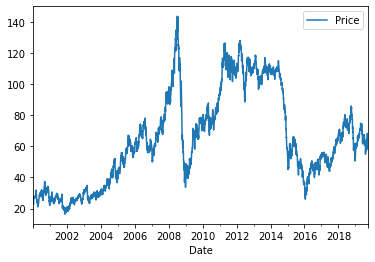

In [ ]:

brent.resample('8H').interpolate('linear').plot();

## Asfreq

In [ ]:
brent.asfreq('10D')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
...,...
2019-09-01,NaN
2019-09-11,63.02
2019-09-21,NaN


# RegEx

In [ ]:
marathon = pd.read_csv('https://andybek.com/pandas-marathon')
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


## Center

In [ ]:
test_string = 'Abublebuble'
test_string.center(100, '*')

'********************************************Abublebuble*********************************************'

## Split Expand

In [ ]:
marathon.Name.str.split(expand=True, n=2) # n of splits

,0,1,2
0,"Kirui,",Geoffrey,None
1,"Rupp,",Galen,None
2,"Osako,",Suguru,None
...,...,...,...
997,"Mccue,",Daniel,T
998,"Larosa,",John,None
999,"Sanchez,",Sam,R


## Find

In [ ]:
marathon.Name.str.find('James').value_counts()

-1     988
 10      3
 8       3
 9       2
 7       2
 12      1
 6       1
Name: Name, dtype: int64

In [ ]:
%%timeit
marathon.Country.str.slice(0,2,1)

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 413 µs per loop


In [ ]:
%%timeit
marathon.Country.str[0:2]

1000 loops, best of 3: 420 µs per loop


## Insert Get Dummies

In [ ]:
dummies = marathon['Years Ran'].str.get_dummies(sep=':')
dummies

,2015,2016
0,0,0
1,0,0
2,0,0
...,...,...
997,0,0
998,0,0
999,0,0


In [ ]:
marathon.insert(marathon.columns.get_loc('Years Ran'), 'Ran 2015', dummies['2015'])
marathon.insert(marathon.columns.get_loc('Years Ran'), 'Ran 2016', dummies['2016'])

In [ ]:
marathon

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,0,0,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
997,"Mccue, Daniel T",40,M,Arlington,MA,USA,2:56:06,998,942,0,0,NaN
998,"Larosa, John",35,M,Danbury,CT,USA,2:56:07,999,943,0,0,NaN
999,"Sanchez, Sam R",35,M,Santa Fe,NM,USA,2:56:08,1000,944,0,0,NaN


Contains, split and replace accept RegEx.


# Visualization

In [ ]:
import matplotlib.pyplot as plt

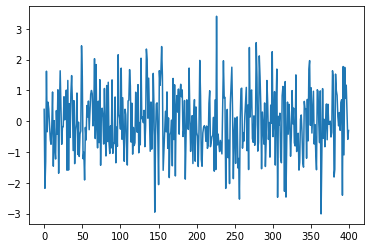

In [ ]:
x = np.random.normal(size=400)
plt.plot(x)

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

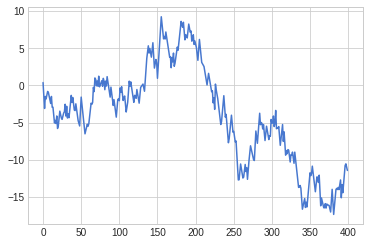

In [ ]:
plt.style.use('fast')
plt.plot(x.cumsum())